In [2]:
# relevant imports

from typing import Dict, List

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rc("axes", titlesize=18)
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16)
plt.rc("ytick", labelsize=16)
plt.rc("legend", fontsize=15)
plt.rc("font", size=15)
plt.rc("lines", linewidth=2)

In [10]:
sheets = [pd.read_csv("dqn/dqn-1hl-2022-04-07 01-03-04.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 02-03-53.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 03-27-23.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 03-40-54.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 04-49-37.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 06-44-15.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 07-15-01.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 08-37-41.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 09-15-56.csv"),
          pd.read_csv("dqn/dqn-1hl-2022-04-07 13-19-50.csv")]

for idx, sheet in enumerate(sheets):
    sheets[idx] = sheet.drop(["Unnamed: 0"], axis=1)
df = pd.concat(sheets, ignore_index=True)

In [12]:
df["agents"] = df["agents"].apply(lambda x: str(x).split(","))

In [13]:
def plot_histogram(
        x: pd.DataFrame, bins: int, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    ax = plt.gca()
    x.hist(ax=ax, bins=bins, density=True, color="xkcd:azure")
    x.plot.kde(ax=ax, color="xkcd:tangerine")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.xlim([x.min(), x.max()])
 
def plot_linegraph(
        x: Dict, xlabel: str, ylabel: str, title: str
    ) -> None:
    plt.figure(figsize=(14,7))
    df_x = pd.DataFrame(data=x)
    plt.plot(df_x[xlabel], df_x[ylabel])
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def plot_barchart(
        x: Dict, xlabel: str, ylabel: str, title: str, rotate: bool = False
    ) -> None:
    plt.figure(figsize=(12, 12))
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.bar(x[xlabel], x[ylabel], width=0.4, color="xkcd:azure")
    plt.xticks(rotation=rotate)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [15]:
print(f'Average Rank for DQN: {df["tn_rank"].sum() / len(df)}')

Average Rank for DQN: 24.88259109311741


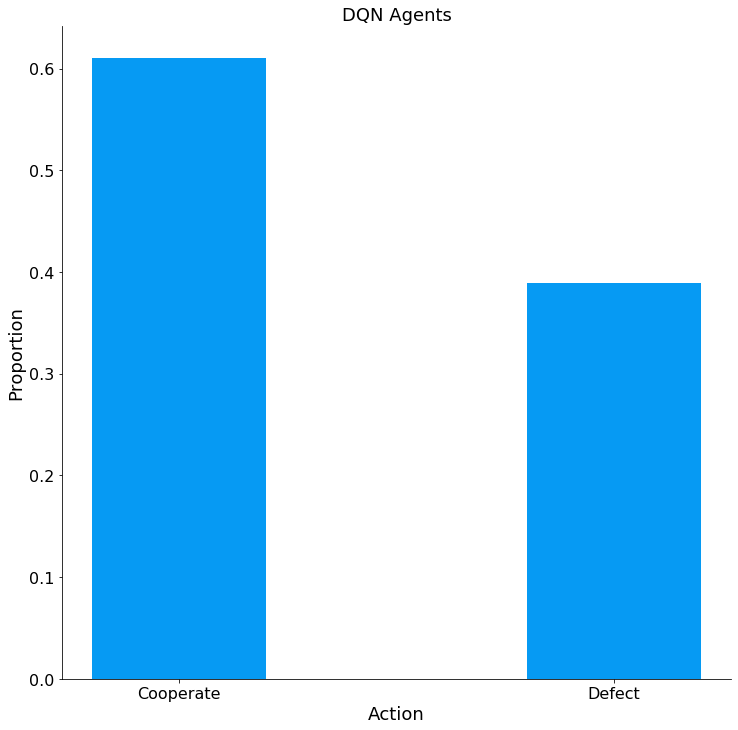

In [16]:
# probability of coop vs defect on a whole for tabular

prob_actions_all = {
    "Action" : ["Cooperate", "Defect"],
    "Proportion" : [
        df["tr_cooperation_percentage"].sum() / len(df),
        df["tr_defection_percentage"].sum() / len(df)
    ]
}
plot_barchart(prob_actions_all, "Action", "Proportion", "DQN Agents")

In [18]:
df["tn_rank"].value_counts()

24    39
23    34
25    24
22    23
31    23
30    18
29    17
27    14
28    12
21     9
26     9
19     6
17     6
18     5
16     3
20     3
11     1
14     1
Name: tn_rank, dtype: int64

In [51]:
df[df["tn_mean_score"] == 762.2293548387097].loc[104, "agents"]

['SteinAndRapoport', 'TidemanAndChieruzzi', 'TitForTat', 'Grofman', 'Davis']

Number of DQN agents ranking 5th or lower: 25
Probability of Cooperating: 0.8081899555555556
Probability of Defecting: 0.19181004444444444


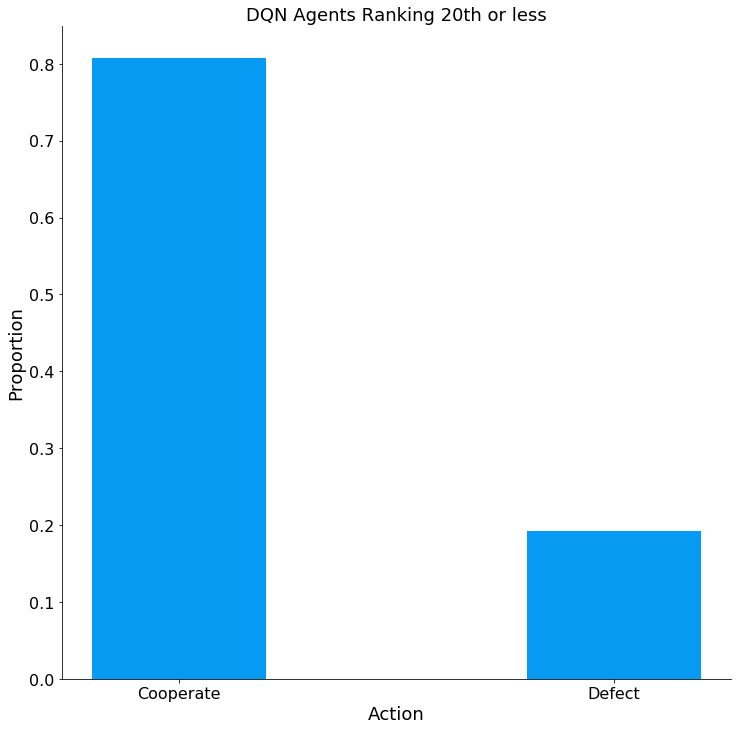

In [20]:
df_agents_top_20 = df[df["tn_rank"] <= 20]
prob_actions_top_20 = {
    "Action" : ["Cooperate", "Defect"],
    "Proportion" : [
        df_agents_top_20["tr_cooperation_percentage"].sum() / len(df_agents_top_20),
        df_agents_top_20["tr_defection_percentage"].sum() / len(df_agents_top_20)
    ]
}

print(f"Number of DQN agents ranking 5th or lower: {len(df_agents_top_20)}")
print(f"Probability of Cooperating: {prob_actions_top_20['Proportion'][0]}")
print(f"Probability of Defecting: {prob_actions_top_20['Proportion'][1]}")

plot_barchart(prob_actions_top_20, "Action", "Proportion", "DQN Agents Ranking 20th or less")

Number of DQN agents ranking 26th or higher: 93
Probability of Cooperating: 0.18229551284348866
Probability of Defecting: 0.8177044871565115


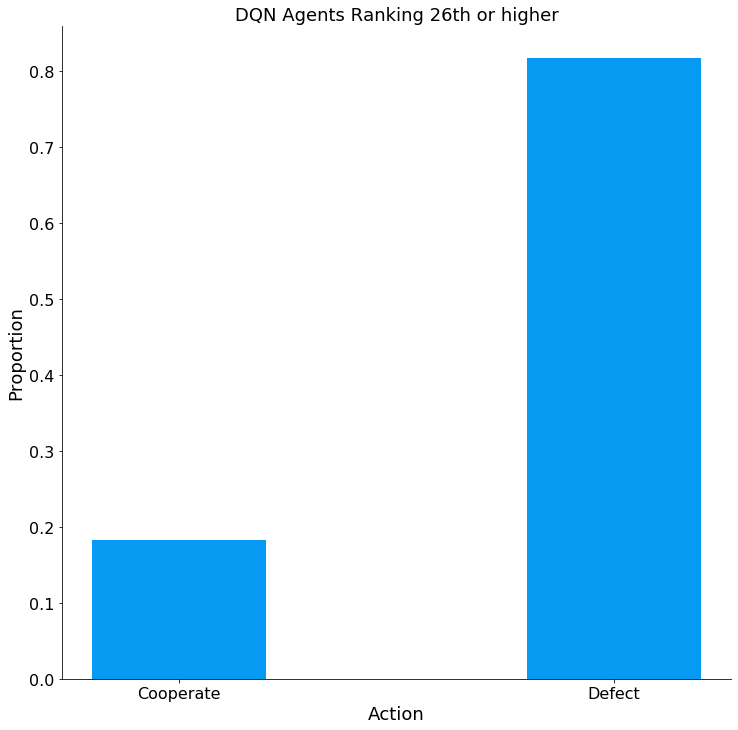

In [21]:
df_agents_bottom_5 = df[df["tn_rank"] >= 26]
prob_actions_bottom_5 = {
    "Action" : ["Cooperate", "Defect"],
    "Proportion" : [
        df_agents_bottom_5["tr_cooperation_percentage"].sum() / len(df_agents_bottom_5),
        df_agents_bottom_5["tr_defection_percentage"].sum() / len(df_agents_bottom_5)
    ]
}
print(f"Number of DQN agents ranking 26th or higher: {len(df_agents_bottom_5)}")
print(f"Probability of Cooperating: {prob_actions_bottom_5['Proportion'][0]}")
print(f"Probability of Defecting: {prob_actions_bottom_5['Proportion'][1]}")
plot_barchart(prob_actions_bottom_5, "Action", "Proportion", "DQN Agents Ranking 26th or higher")

In [22]:
df["epsilon"].value_counts()

0.10    111
0.20     69
0.05     67
Name: epsilon, dtype: int64

Epsilon Count  Avg Rank
0.05    67    25.030
0.1    111    24.703
0.2    69    25.029


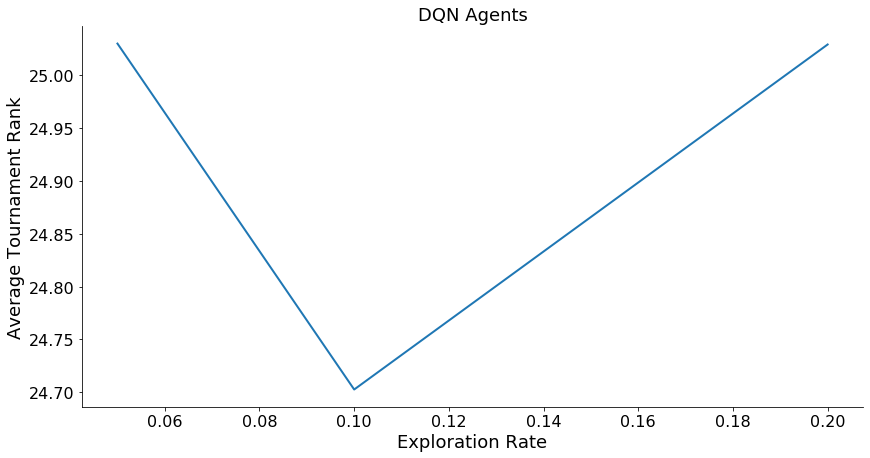

In [24]:
avg_epsil_all = {
    "Exploration Rate" : [0.05, 0.1, 0.2],
    "Average Tournament Rank" : [
        df[df["epsilon"] == 0.05]["tn_rank"].sum() / len(df[df["epsilon"] == 0.05]),
        df[df["epsilon"] == 0.1]["tn_rank"].sum() / len(df[df["epsilon"] == 0.1]),
        df[df["epsilon"] == 0.2]["tn_rank"].sum() / len(df[df["epsilon"] == 0.2])     
    ]
}
print("Epsilon Count  Avg Rank")
print(f"{avg_epsil_all['Exploration Rate'][0]}    {len(df[df['epsilon'] == 0.05])}    {avg_epsil_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_epsil_all['Exploration Rate'][1]}    {len(df[df['epsilon'] == 0.1])}    {avg_epsil_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_epsil_all['Exploration Rate'][2]}    {len(df[df['epsilon'] == 0.2])}    {avg_epsil_all['Average Tournament Rank'][2]:.3f}")

plot_linegraph(avg_epsil_all, "Exploration Rate", "Average Tournament Rank", "DQN Agents")

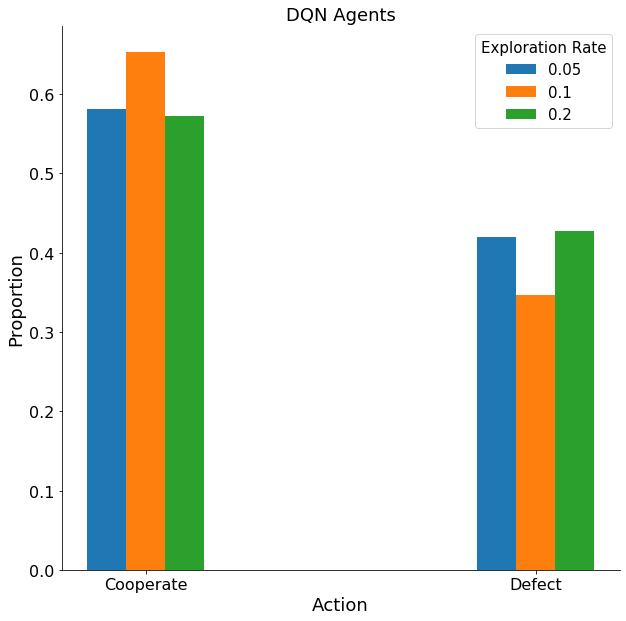

In [25]:
coop_epsil_05 = df[df["epsilon"] == 0.05]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.05])
coop_epsil_1 = df[df["epsilon"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.1])
coop_epsil_2 = df[df["epsilon"] == 0.2]["tr_cooperation_percentage"].sum() / len(df[df["epsilon"] == 0.2])

defect_epsil_05 = df[df["epsilon"] == 0.05]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.05])
defect_epsil_1 = df[df["epsilon"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.1])
defect_epsil_2 = df[df["epsilon"] == 0.2]["tr_defection_percentage"].sum() / len(df[df["epsilon"] == 0.2])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.1, [coop_epsil_05, defect_epsil_05], 0.1, label="0.05")
plt.bar(x_axis, [coop_epsil_1, defect_epsil_1], 0.1, label="0.1")
plt.bar(x_axis + 0.1, [coop_epsil_2, defect_epsil_2], 0.1, label="0.2")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Proportion")
plt.title("DQN Agents")
plt.legend(title="Exploration Rate")

In [26]:
df["lookback"].value_counts()

2    75
4    72
8    71
1    29
Name: lookback, dtype: int64

Lookback Count  Avg Rank
1    29    24.724
2    75    25.280
4    72    24.514
8    71    24.901


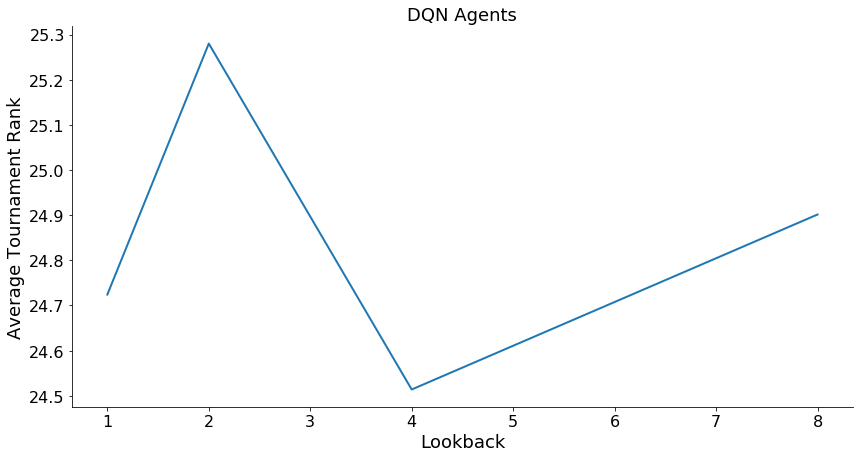

In [28]:
avg_lb_all =  {
    "Lookback" : [1, 2, 4, 8],
    "Average Tournament Rank" : [
        df[df["lookback"] == 1]["tn_rank"].sum() / len(df[df["lookback"] == 1]),
        df[df["lookback"] == 2]["tn_rank"].sum() / len(df[df["lookback"] == 2]),
        df[df["lookback"] == 4]["tn_rank"].sum() / len(df[df["lookback"] == 4]),
        df[df["lookback"] == 8]["tn_rank"].sum() / len(df[df["lookback"] == 8])
    ]
}

print("Lookback Count  Avg Rank")
print(f"{avg_lb_all['Lookback'][0]}    {len(df[df['lookback'] == 1])}    {avg_lb_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_lb_all['Lookback'][1]}    {len(df[df['lookback'] == 2])}    {avg_lb_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_lb_all['Lookback'][2]}    {len(df[df['lookback'] == 4])}    {avg_lb_all['Average Tournament Rank'][2]:.3f}")
print(f"{avg_lb_all['Lookback'][3]}    {len(df[df['lookback'] == 8])}    {avg_lb_all['Average Tournament Rank'][3]:.3f}")
plot_linegraph(avg_lb_all, "Lookback", "Average Tournament Rank", "DQN Agents")

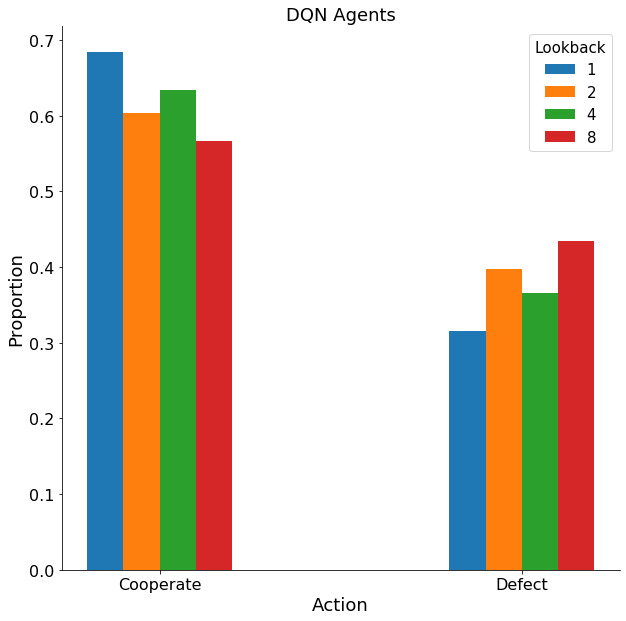

In [29]:
coop_lb_1 = df[df["lookback"] == 1]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 1])
coop_lb_2 = df[df["lookback"] == 2]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 2])
coop_lb_4 = df[df["lookback"] == 4]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 4])
coop_lb_8 = df[df["lookback"] == 8]["tr_cooperation_percentage"].sum() / len(df[df["lookback"] == 8])

defect_lb_1 = df[df["lookback"] == 1]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 1])
defect_lb_2 = df[df["lookback"] == 2]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 2])
defect_lb_4 = df[df["lookback"] == 4]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 4])
defect_lb_8 = df[df["lookback"] == 8]["tr_defection_percentage"].sum() / len(df[df["lookback"] == 8])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.15, [coop_lb_1, defect_lb_1], 0.1, label="1")
plt.bar(x_axis - 0.05, [coop_lb_2, defect_lb_2], 0.1, label="2")
plt.bar(x_axis + 0.05, [coop_lb_4, defect_lb_4], 0.1, label="4")
plt.bar(x_axis + 0.15, [coop_lb_8, defect_lb_8], 0.1, label="8")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Proportion")
plt.title("DQN Agents")
plt.legend(title="Lookback")

In [30]:
df["discount_rate"].value_counts()

0.99    149
0.95     98
Name: discount_rate, dtype: int64

DiscountRate Count  Avg Rank
0.95    98    26.031
0.99    149    24.128


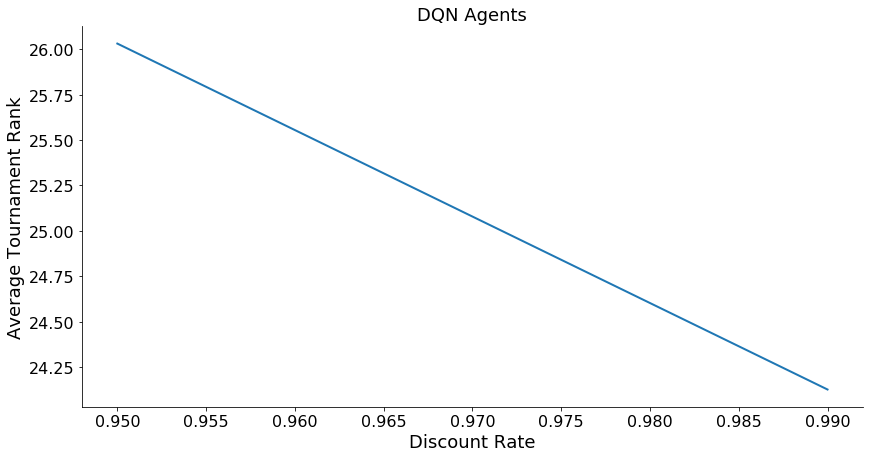

In [38]:
avg_dr_all =  {
    "Discount Rate" : [0.95, 0.99],
    "Average Tournament Rank" : [
        df[df["discount_rate"] == 0.95]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.95]),
        df[df["discount_rate"] == 0.99]["tn_rank"].sum() / len(df[df["discount_rate"] == 0.99]),
    ]
}

print("DiscountRate Count  Avg Rank")
print(f"{avg_dr_all['Discount Rate'][0]}    {len(df[df['discount_rate'] == 0.95])}    {avg_dr_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_dr_all['Discount Rate'][1]}    {len(df[df['discount_rate'] == 0.99])}    {avg_dr_all['Average Tournament Rank'][1]:.3f}")
plot_linegraph(avg_dr_all, "Discount Rate", "Average Tournament Rank", "DQN Agents")

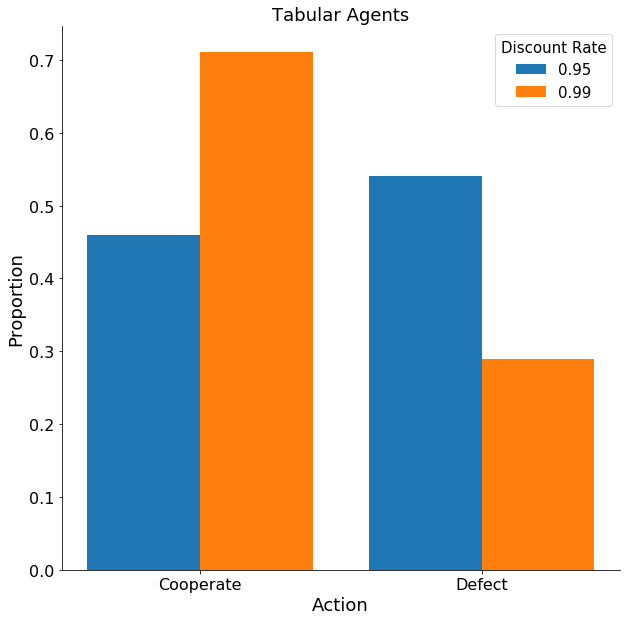

In [32]:
coop_dr_95 = df[df["discount_rate"] == 0.95]["tr_cooperation_percentage"].sum() / len(df[df["discount_rate"] == 0.95])
coop_dr_99 = df[df["discount_rate"] == 0.99]["tr_cooperation_percentage"].sum() / len(df[df["discount_rate"] == 0.99])

defect_dr_95 = df[df["discount_rate"] == 0.95]["tr_defection_percentage"].sum() / len(df[df["discount_rate"] == 0.95])
defect_dr_99 = df[df["discount_rate"] == 0.99]["tr_defection_percentage"].sum() / len(df[df["discount_rate"] == 0.99])

plt.figure(figsize=(10,10))
plt.bar(x_axis - 0.2, [coop_dr_95, defect_dr_95], 0.4, label="0.95")
plt.bar(x_axis + 0.2, [coop_dr_99, defect_dr_99], 0.4, label="0.99")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Proportion")
plt.title("DQN Agents")
plt.legend(title="Discount Rate")

In [33]:
df["learning_rate"].value_counts()

0.010    94
0.100    78
0.001    62
0.050     9
0.005     4
Name: learning_rate, dtype: int64

Learning Rate Count  Avg Rank
0.001    62    26.661
0.01    94    24.798
0.05    9    25.889
0.1    78    23.385


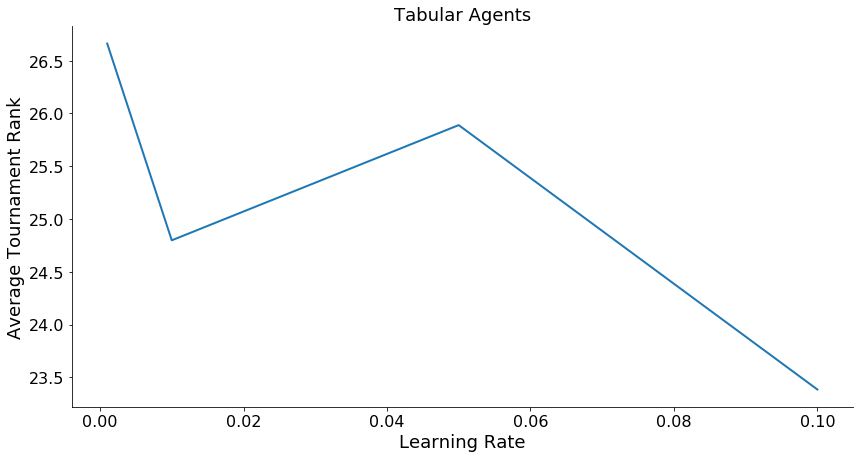

In [34]:
avg_lr_all =  {
    "Learning Rate" : [0.001, 0.01, 0.05, 0.1],
    "Average Tournament Rank" : [
        df[df["learning_rate"] == 0.001]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.001]),
        df[df["learning_rate"] == 0.01]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.01]),
        df[df["learning_rate"] == 0.05]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.05]),
        df[df["learning_rate"] == 0.1]["tn_rank"].sum() / len(df[df["learning_rate"] == 0.1]),
    ]
}

print("Learning Rate Count  Avg Rank")
print(f"{avg_lr_all['Learning Rate'][0]}    {len(df[df['learning_rate'] == 0.001])}    {avg_lr_all['Average Tournament Rank'][0]:.3f}")
print(f"{avg_lr_all['Learning Rate'][1]}    {len(df[df['learning_rate'] == 0.01])}    {avg_lr_all['Average Tournament Rank'][1]:.3f}")
print(f"{avg_lr_all['Learning Rate'][2]}    {len(df[df['learning_rate'] == 0.05])}    {avg_lr_all['Average Tournament Rank'][2]:.3f}")
print(f"{avg_lr_all['Learning Rate'][3]}    {len(df[df['learning_rate'] == 0.1])}    {avg_lr_all['Average Tournament Rank'][3]:.3f}")
plot_linegraph(avg_lr_all, "Learning Rate", "Average Tournament Rank", "DQN Agents")

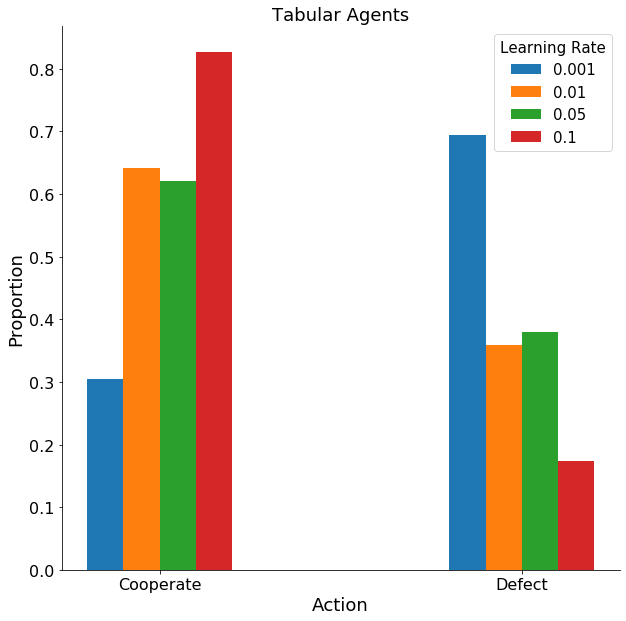

In [35]:
coop_lr_001 = df[df["learning_rate"] == 0.001]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
coop_lr_01 = df[df["learning_rate"] == 0.01]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
coop_lr_05 = df[df["learning_rate"] == 0.05]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.05])
coop_lr_1 = df[df["learning_rate"] == 0.1]["tr_cooperation_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

defect_lr_001 = df[df["learning_rate"] == 0.001]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.001])
defect_lr_01 = df[df["learning_rate"] == 0.01]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.01])
defect_lr_05 = df[df["learning_rate"] == 0.05]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.05])
defect_lr_1 = df[df["learning_rate"] == 0.1]["tr_defection_percentage"].sum() / len(df[df["learning_rate"] == 0.1])

cols = ["Cooperate", "Defect"]
x_axis = np.arange(len(cols))
plt.figure(figsize=(10, 10))
plt.bar(x_axis - 0.15, [coop_lr_001, defect_lr_001], 0.1, label="0.001")
plt.bar(x_axis - 0.05, [coop_lr_01, defect_lr_01], 0.1, label="0.01")
plt.bar(x_axis + 0.05, [coop_lr_05, defect_lr_05], 0.1, label="0.05")
plt.bar(x_axis + 0.15, [coop_lr_1, defect_lr_1], 0.1, label="0.1")
plt.xticks(x_axis, cols)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Action")
plt.ylabel("Proportion")
plt.title("DQN Agents")
plt.legend(title="Learning Rate")

In [36]:
def calc_pool_avg_rank_count(df: pd.DataFrame) -> List[List]:
    pool_counts = list(zip(df["agents"].value_counts().index.to_list(), df["agents"].value_counts().to_list()))
    pool_avgs = []
    for r_idx, row in df.iterrows():
        found = 0
        for elem in pool_avgs:
            if elem[0] == row["agents"]:
                elem[1] += row["tn_rank"]
                found = 1
        if not found:
            pool_avgs.append([row["agents"], row["tn_rank"]])

    for pool in pool_avgs:
        for item in pool_counts:
            if pool[0] == item[0]:
                pool[1] = pool[1] / item[1]
                pool.append(item[1])
                break
    return pool_avgs

In [37]:
pools = calc_pool_avg_rank_count(df)
pools = sorted(pools, key = lambda x: x[1])
for pool in pools:
    print(f"Pool: {pool[0]},\nAvg Rank: {pool[1]},\nCount: {pool[2]}\n")

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Borufsen', 'SteinAndRapoport', 'Champion'],
Avg Rank: 23.5,
Count: 18

Pool: ['TitForTat', 'Joss', 'Downing'],
Avg Rank: 23.555555555555557,
Count: 18

Pool: ['TitForTat', 'SecondByCave', 'Leyvraz'],
Avg Rank: 24.555555555555557,
Count: 9

Pool: ['TitForTat', 'TidemanAndChieruzzi', 'Borufsen', 'SecondByGraaskampKatzen', 'Nydegger', 'Grofman', 'Shubik', 'Champion', 'Leyvraz'],
Avg Rank: 24.724137931034484,
Count: 29

Pool: ['TitForTat', 'Champion', 'Borufsen', 'SecondByCave', 'SecondByWmAdams', 'SecondByGraaskampKatzen'],
Avg Rank: 25.0,
Count: 4

Pool: ['SteinAndRapoport', 'TidemanAndChieruzzi', 'TitForTat', 'Grofman', 'Davis'],
Avg Rank: 25.098765432098766,
Count: 162

Pool: ['OmegaTFT', 'Pavlov', 'SecondByWeiner', 'Borufsen', 'Leyvraz'],
Avg Rank: 26.25,
Count: 4

Pool: ['TitForTat', 'TFTT', 'TTFT', 'GenerousTFT', 'OmegaTFT', 'Davis', 'Grofman', 'Leyvraz'],
Avg Rank: 29.0,
Count: 1

Pool: ['OmegaTFT', 'SecondByWeiner', 'Borufsen', 'Leyvraz'

Text(0, 0.5, 'Mean Proportion of Cooperative Moves in Training')

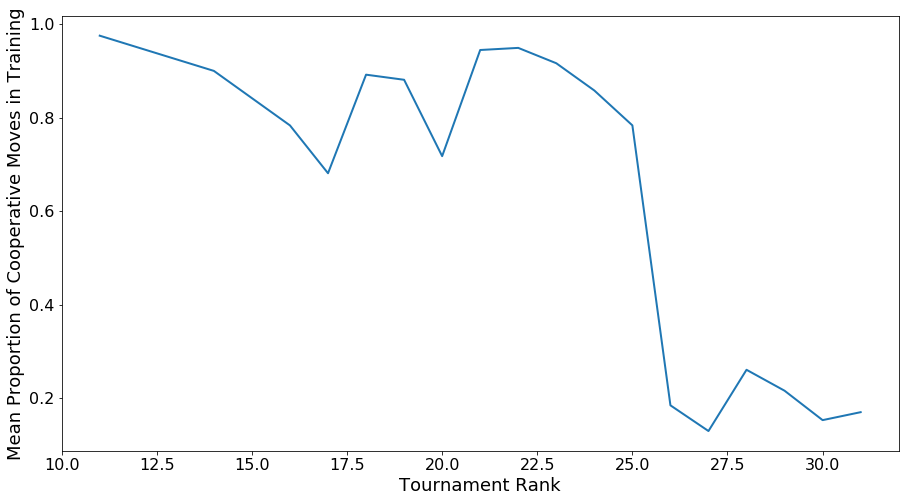

In [39]:
tn_ranks = []
for r_idx, row in df.iterrows():
    if not row["tn_rank"] in tn_ranks:
        tn_ranks.append(row["tn_rank"])
ranks_coop = {}
tn_ranks = sorted(tn_ranks)
for rank in tn_ranks:
    ranks_coop[rank] = df[df["tn_rank"] == rank]["tr_cooperation_percentage"].sum() / len(df[df["tn_rank"] == rank])

plt.figure(figsize=(15,8))
plt.plot(list(ranks_coop.keys()), list(ranks_coop.values()))
plt.xlabel("Tournament Rank")
plt.ylabel("Mean Proportion of Cooperative Moves in Training")